## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as pyplot
%matplotlib inline

from __future__ import division
import scipy.stats as sps
import statsmodels as sm

## Exercise 1

To determine normality, first use eyeball test:

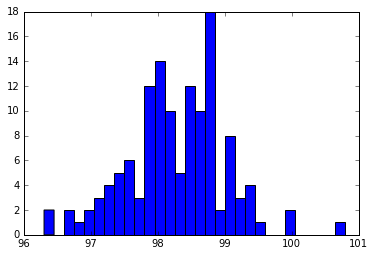

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')
pyplot.hist(df.temperature, bins=30)
None

It's somewhat mound-shaped, but also possibly asymmetric. To gauge asymmetry, there is a skew test:

In [3]:
print sps.skew(df.temperature)
print sps.skewtest(df.temperature)

-0.00436797687908
SkewtestResult(statistic=-0.021370491432771001, pvalue=0.98295011261353815)


The null hypothesis in this case is the claim that the skew is normal. This p-value is very high, so this skew is in line with what we would see for a normal distribution. However, the kurtosis is more extreme:

In [4]:
print sps.kurtosis(df.temperature,fisher=False)
print sps.kurtosistest(df.temperature)
print sps.normaltest(df.temperature)

3.70495978541
KurtosistestResult(statistic=1.6441851280847679, pvalue=0.10013796794683075)
NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


If the distribution is normal, there would only be a 25.9 percent chance the distribution would look this extreme, because of the high kurtosis (normal kurtosis is 3). However, the p-value is not low enough to reject the null hypothesis.

As a less-refined way of judging normality, we can calculate the fraction data falling outside of one sigma, two sigma and three:

In [5]:
mu, s = df.temperature.mean(), df.temperature.std()
[sum(abs(df.temperature-mu) < (m+1)*s)/len(df.temperature) for m in range(3)]

[0.69230769230769229, 0.94615384615384612, 0.99230769230769234]

Those values are close to what we would expect (68, 95, 99.7). High kurtosis usually indicates thick tails, but these values do not seem to bear this out. Possibly the high kurtosis is just an artifact of low sample size. Either way, we cannot reject normality, so our tentative answer is that this distribution is normal.


## Exercise 2

Our sample mean is pretty close to 98.6, but the standard error is considerably smaller than the discrepancy:

In [6]:
print mu
print sps.sem(df.temperature)

98.2492307692
0.0643044168379


Our sample size is considerably greater than 30, so we should use a z-statistic:

In [7]:
n=len(df.temperature)
print n

130


Our results are not likely to differ from the t-test however, as the t-test approaches the z-test for large n. As we can see the z-statistic is extreme:

In [8]:
z=(mu-98.6)/sps.sem(df.temperature)
print z

-5.45482329236


The probability that the sample mean is 98.2492307692 or lower, given the true mean is 98.6, is very low:

In [10]:
sps.norm.cdf(z)

2.451078507056712e-08

So we must reject the null hypothesis. We can say with high probability that the normal body temperature is not 98.6

## Exercise 3

We compute the 95% confidence interval:

In [11]:
confidence = 0.95
h = sps.sem(df.temperature)*sps.norm._ppf( (1+confidence)/2.) 
print [mu-h,mu+h]

[98.123196428181657, 98.375265110279898]


So we should consider any temperature lower than 98.12 or higher than 98.38 to be abnormal.

## Exercise 4

The mean temperature of males in the sample is lower than that of the females by roughly 0.3 degrees:

In [12]:
man_temp, lady_temp = df.temperature[df.gender=='M'], df.temperature[df.gender=='F']
man_temp.mean(), lady_temp.mean()

(98.1046153846154, 98.39384615384613)

We should check that our subsample sizes are still greater than 30:

In [14]:
n1, n2 =  len(man_temp), len(lady_temp)
print n1, n2

65 65


Now we compute the two-sample z-statistic:

In [17]:
sediff = math.hypot(sps.sem(man_temp),sps.sem(lady_temp))
z2= (lady_temp.mean()-man_temp.mean())/sediff
z2

2.2854345381652736

That's fairly high. If our null hypothesis is that "Women do not have higher body temperatures then men", then we can reject this null hypothes

In [20]:
1-sps.norm.cdf(z2)

0.011143680380338639

In [19]:
sediff

0.12655395041982645

In [175]:
math.hypot(sps.sem(lady_temp),sps.sem(man_temp))

0.12655395041982645